<a href="https://colab.research.google.com/github/jainkhere/neuro/blob/main/_EXPERIMENTS/11-27/segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
#!pip install git+https://github.com/Borda/pyImSegm.git
import os, sys, glob, time
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries
sys.path += [os.path.abspath('.'), os.path.abspath('..')] # Add path to root
import imsegm.utilities.data_io as tl_data
import imsegm.pipelines as segm_pipe

[]


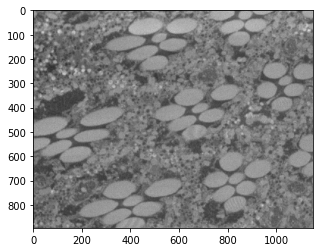

In [ ]:
path_dir = os.path.join(tl_data.update_path('data-images'), 'others')
print ([os.path.basename(p) for p in glob.glob(os.path.join(path_dir, '*.jpg'))])
path_img = os.path.join(path_dir, 'a.jpeg')

img = np.array(Image.open(path_img))

FIG_SIZE = (8. * np.array(img.shape[:2]) / np.max(img.shape))[::-1]
_= plt.imshow(img)



In [ ]:
nb_classes = 3
sp_size = 25
sp_regul = 0.2
dict_features = {'color': ['mean', 'std', 'median']}

In [ ]:
model, _ = segm_pipe.estim_model_classes_group([img], nb_classes, sp_size=sp_size, sp_regul=sp_regul, 
                                               dict_features=dict_features, pca_coef=None, model_type='GMM')

compute SLIC & features @1-threads:   0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/imsegm/superpixels.py:62: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  img, n_segments=slic_nb_spx, compactness=slic_compact, sigma=1, enforce_connectivity=True, slic_zero=slico
compute SLIC & features @1-threads: 100%|██████████| 1/1 [00:03<00:00,  3.29s/it]


In [ ]:
dict_debug = {}
seg, _ = segm_pipe.segment_color2d_slic_features_model_graphcut(img, model, sp_size=sp_size, sp_regul=sp_regul, 
                     dict_features=dict_features, gc_regul=5., gc_edge_type='color', debug_visual=dict_debug)

/usr/local/lib/python3.7/dist-packages/imsegm/superpixels.py:62: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  img, n_segments=slic_nb_spx, compactness=slic_compact, sigma=1, enforce_connectivity=True, slic_zero=slico
/usr/local/lib/python3.7/dist-packages/imsegm/pipelines.py:222: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  debug_visual['slic_mean'] = sk_color.label2rgb(slic, image, kind='avg')


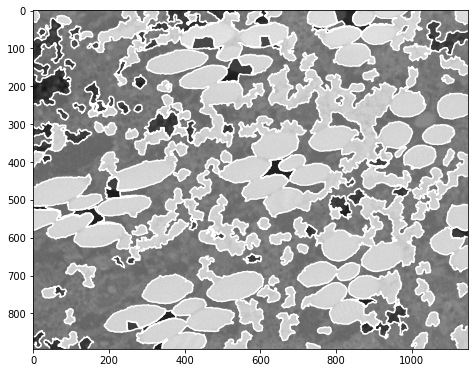

In [ ]:
fig = plt.figure(figsize=FIG_SIZE)
plt.imshow(img)
plt.imshow(seg, alpha=0.6, cmap='gray')
_= plt.contour(seg, levels=np.unique(seg), colors='w')

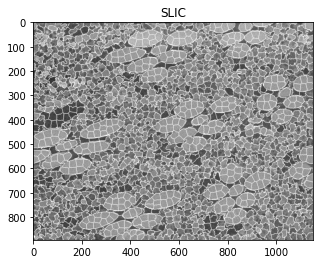

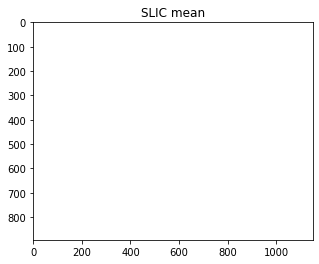

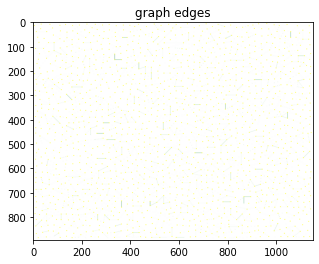

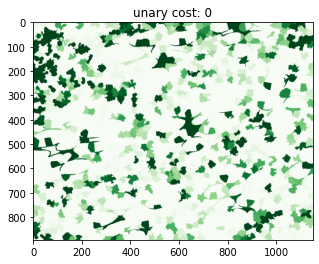

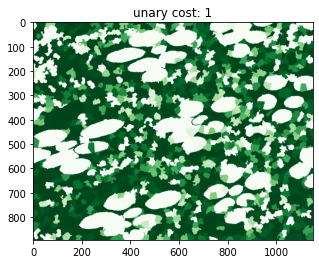

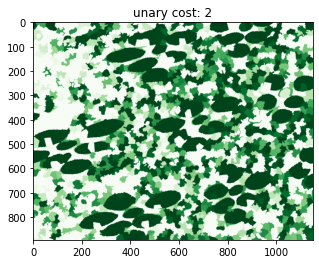

In [ ]:
plt.figure(), plt.imshow(mark_boundaries(img, dict_debug['slic'], color=(1, 1, 1))), plt.title('SLIC')
plt.figure(), plt.imshow(dict_debug['slic_mean']), plt.title('SLIC mean')
plt.figure(), plt.imshow(dict_debug['img_graph_edges']), plt.title('graph edges')
for i, im_u in enumerate(dict_debug['imgs_unary_cost']):
    plt.figure(), plt.title('unary cost: %i' % i), plt.imshow(im_u)
# plt.figure(), plt.imshow(dict_debug['img_graph_segm'])